In [20]:
%load_ext autoreload
%autoreload 2

In [34]:
import pandas as pd

from split import RunSplitTest
from epsilon import RunEpsilonGreedy
from thompson import RunThompsonSampling

from plotting import stacked_plot
from helpers import define_batches, get_minimum_sample

In [205]:
alpha = 0.01
bandit_returns = [.001, .004, .005]
examples_needed = get_minimum_sample(bandit_returns, alpha)

In [206]:
batch_size = 1000
batches = define_batches(examples_needed, batch_size)

In [207]:
rst = RunSplitTest(bandit_returns,
                          batch_size=batch_size,
                          batches=batches)
rst.run()

In [208]:
epsilon = 0.2

reg = RunEpsilonGreedy(bandit_returns,
                       epsilon=epsilon, 
                       batch_size=batch_size,
                       batches=batches,
                       simulations=10)
reg.run()

In [209]:
sample_size = int(1e3)
rts = RunThompsonSampling(bandit_returns,
                          alpha_priors=None,
                          beta_priors=None,
                          sample_size=sample_size,
                          batch_size=batch_size,
                          batches=batches,
                          simulations=5)
rts.run()

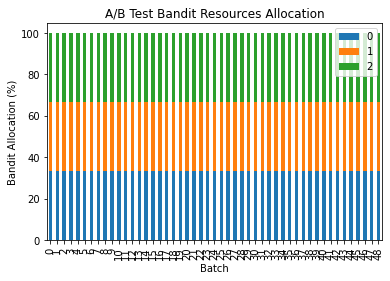

In [210]:
stacked_plot(rst.df_bids,
             title='A/B Test Bandit Resources Allocation',
             x_label='Batch',
             y_label='Bandit Allocation (%)')

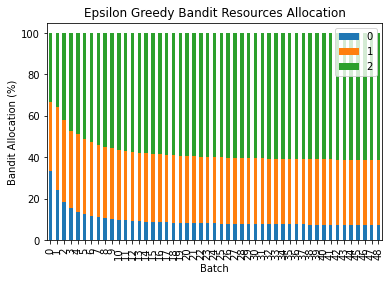

In [211]:
stacked_plot(reg.df_bids,
             title='Epsilon Greedy Bandit Resources Allocation',
             x_label='Batch',
             y_label='Bandit Allocation (%)')

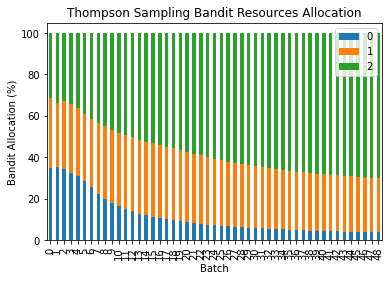

In [212]:
stacked_plot(rts.df_bids,
             title='Thompson Sampling Bandit Resources Allocation',
             x_label='Batch',
             y_label='Bandit Allocation (%)')

In [213]:
reg_gain = reg.df_clicks.sum(axis=1)
rts_gain = rts.df_clicks.sum(axis=1)
rst_gain = rst.df_clicks.sum(axis=1)
df_gains = pd.concat([reg_gain, rts_gain, rst_gain], axis=1)
df_gains.rename(columns={0: 'Epsilon Greedy MAB', 1: 'Thompson Sampling', 2: 'Split Test'}, inplace=True)

<AxesSubplot:>

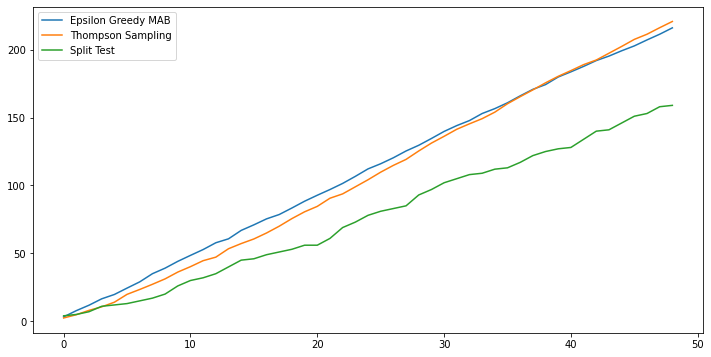

In [214]:
df_gains.plot(figsize=(12,6))